In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Load and preprocess the CIFAR-10 dataset 

In [17]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Normalize the data (pixel values between 0 and 1)

In [18]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

One-hot encode the labels

In [19]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Build the CNN model

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train the model

In [22]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3065 - loss: 1.8655 - val_accuracy: 0.5439 - val_loss: 1.2711
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5356 - loss: 1.2998 - val_accuracy: 0.6235 - val_loss: 1.0600
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6090 - loss: 1.1194 - val_accuracy: 0.6536 - val_loss: 1.0035
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6511 - loss: 1.0003 - val_accuracy: 0.6777 - val_loss: 0.9195
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6822 - loss: 0.9135 - val_accuracy: 0.6972 - val_loss: 0.8655
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7036 - loss: 0.8501 - val_accuracy: 0.7051 - val_loss: 0.8395
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.7220 - loss: 0.8010 - val_accuracy: 0.6994 - val_loss: 0.8771
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7429 - loss: 0.7405 - val_acc

Visualizing Training Performance

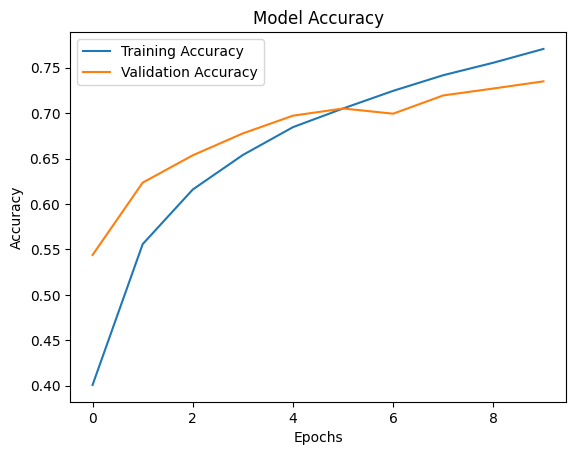

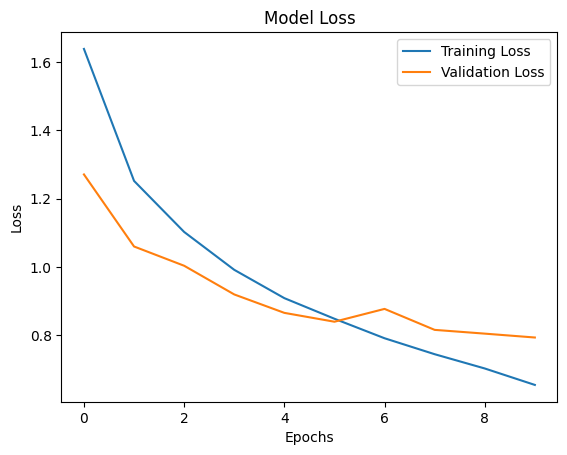

In [23]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Evaluate the model

In [24]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 - 1s - 3ms/step - accuracy: 0.7350 - loss: 0.7933
Test Accuracy: 0.74


Save the model

In [25]:
model.save("cnn_cifar10_model.h5")